<a href="https://colab.research.google.com/github/Manisha021095/Manisha_INFO5731_Fall2022/blob/main/In_class_exercise_05_11172022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here

# Saving the train data in a dataframe

import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/exercise05_datacollection/exercise09_datacollection/stsa-train.txt',sep = 'delimiter=',header= None,names=['reviews'])
train_data[['sentiment','reviews']] = train_data['reviews'].str.split(" ", 1, expand=True)
train_data.head()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,reviews,sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
# Saving the test data in a dataframe

test_data = pd.read_csv('/content/drive/MyDrive/exercise05_datacollection/exercise09_datacollection/stsa-test.txt',sep = 'delimiter=',header= None,names=['reviews'])
test_data[['sentiment','reviews']] = test_data['reviews'].str.split(" ", 1, expand=True)
test_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,reviews,sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [2]:
# Importing libraries for data cleaning

import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean(review):
    review ="".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+',review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Finding the frequency of the individual words in the reviews using tf-idf vectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean)
X_tfidf = tfidf_vect.fit_transform(train_data['reviews'])

print(X_tfidf.shape)


# Saving both the train and test words in a different data frame 
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_test_tfidf = tfidf_vect.transform(test_data['reviews'])
print(X_test_tfidf.shape)

(6920, 13343)
(1821, 13343)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Algortihms :- 
1) MultinominalNB

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Sampling the training set
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train_data['sentiment'].values,
                                                test_size=0.2, random_state=42)
# Model fit using .fit()
model_mnb = mnb.fit(x_train,y_train)
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [ ]:
# Calculating the cross-validation scores for MultinominalNB:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=10)
print("MultinominalNB score: ",scores.mean())

MultinominalNB score:  0.7247054530288813


2) SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier

svm = LinearSVC()
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
# Calculating the cross-validation scores for SVM:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("SVM score:",scores.mean())

SVM score: 0.7348034615785632


3) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model_knn = knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_knn,y_test))
print(classification_report(y_test,y_pred_knn))


Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
# Calculating cross-value score for KNN:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_test, y_test, cv=10)
print("KNN score:",scores.mean())

KNN score: 0.6675737670732979


4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_dt,y_test))
print(classification_report(y_test,y_pred_dt))

Accuracy 0.6596820809248555
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       671
           1       0.66      0.69      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [ ]:
# Calculating cross value score for Decision Tree:

scores = cross_val_score(dt, x_test, y_test, cv=10)
print("Decision tree score:",scores.mean())

Decision tree score: 0.6220675633406318


5) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_rf,y_test))
print(classification_report(y_test,y_pred_rf))

Accuracy 0.7319364161849711
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       671
           1       0.70      0.83      0.76       713

    accuracy                           0.73      1384
   macro avg       0.74      0.73      0.73      1384
weighted avg       0.74      0.73      0.73      1384



In [ ]:
# Calculating cross value score for Random Forest:

cores = cross_val_score(rf, x_test, y_test, cv=10)
print("Random forest score",scores.mean())

Random forest score 0.6220675633406318


6) XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb = xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_xgb,y_test))
print(classification_report(y_test,y_pred_xgb))

Accuracy 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384



In [ ]:
# Calculating cross value score for XGBoost:

scores = cross_val_score(xgb, x_test, y_test, cv=10)
print("XGBoost score:",scores.mean())

XGBoost score: 0.6184704410384736


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [3]:
#Write your code here.

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv/Amazon_Unlocked_Mobile.csv')

In [4]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


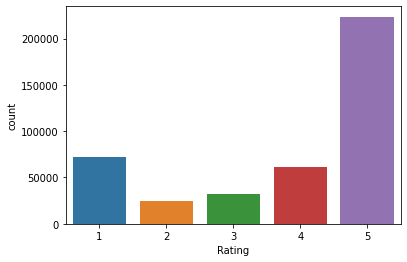

In [6]:
import seaborn as sns
sns.countplot(df.Rating)

In [7]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with Rating less than 3 to be positive
actualScore = df['Rating']
positiveNegative = actualScore.map(partition) 
df['RatingTransformed'] = positiveNegative

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


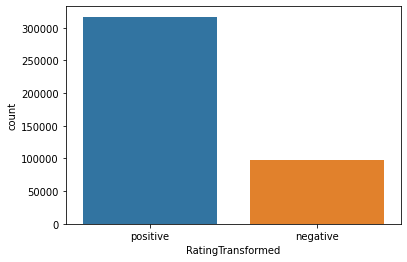

In [8]:
sns.countplot(df.RatingTransformed)

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#initialising the snowball stemmer which is developed in recent years
sno = nltk.stem.SnowballStemmer('english') 
stop=set(stopwords.words('english'))

final = df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned_data = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleaned_data = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned_data)
    return  cleaned_data

In [13]:
final = df.sample(n=1000, random_state=1)

In [14]:
# Clean text
import re

i=0
str1=' '
final_string=[]
# store words from +ve reviews here
all_positive_words=[] 
# store words from -ve reviews here.
all_negative_words=[] 
s=''
for sent in final['Reviews'].values:
    filtered_sent=[]
    #sent=cleanhtml(sent) # remove HTMl tags
    try:
      for w in sent.split():
          for cleaned_words in cleanpunc(w).split():
              if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                  if(cleaned_words.lower() not in stop):
                      s=(sno.stem(cleaned_words.lower())).encode('utf8')
                      filtered_sent.append(s)
                      if (final['RatingTransformed'].values)[i] == 'positive': 
                        #list of all words used to describe positive reviews
                          all_positive_words.append(s) 
                      if(final['RatingTransformed'].values)[i] == 'negative':
                        #list of all words used to describe negative reviews reviews
                          all_negative_words.append(s) 
                  else:
                      continue
              else:
                  continue 
                   #final string of cleaned words
      str1 = b" ".join(filtered_sent)
      
      #print('str1:', str1)
      final_string.append(str1)
      i+=1
    except AttributeError as e:
      # No words to split
      final_string.append('')
      i+=1

In [15]:
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#bow = count_vect.fit_transform(final['CleanedText'].values)
bow = count_vect.fit_transform(final['CleanedText'].values)
print(bow.shape)

(1000, 2660)


In [17]:
terms = count_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [19]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [20]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.8677877653732496

In [21]:
dafrme = final
dafrme['Bow Clus Label'] = model.labels_ 
dafrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2


In [22]:
dafrme.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0     34
1      1
2    958
3      1
4      1
5      1
6      1
7      1
8      1
9      1
Name: Reviews, dtype: int64

In [23]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 use
 batteri
 like
 good
 camera
 time
 one
 get
 screen
Cluster 1: phone
 seller
 month
 work
 samsung
 report
 return
 said
 unlock
 stolen
Cluster 2: phone
 work
 use
 great
 get
 good
 one
 screen
 like
 time
Cluster 3: phone
 got
 month
 product
 later
 compani
 dont
 never
 give
 apart
Cluster 4: phone
 gps
 app
 problem
 get
 fix
 navig
 use
 screen
 work
Cluster 5: phone
 camera
 realli
 screen
 servic
 photo
 gps
 take
 compani
 need
Cluster 6: phone
 applic
 updat
 contact
 turn
 work
 deal
 quit
 tri
 facebook
Cluster 7: phone
 cabl
 issu
 tri
 port
 card
 factori
 qualiti
 connect
 proper
Cluster 8: phone
 small
 like
 sometim
 get
 micro
 take
 sinc
 usb
 use
Cluster 9: phone
 use
 flir
 one
 great
 your
 cant
 see
 there
 featur


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


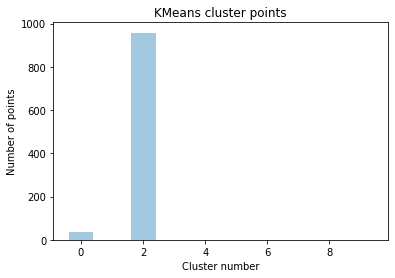

In [24]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], dafrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)
tf_idf.shape

(1000, 2660)

In [26]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(tf_idf)

KMeans(n_clusters=10, random_state=99)

In [27]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.00211943, 0.00463832, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00025242, 0.00691803, ..., 0.0009042 , 0.00113021,
        0.00099414],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
terms1 = tf_idf_vect.get_feature_names()
terms1[1:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abil',
 'abl',
 'abnorm',
 'abroad',
 'absolut',
 'absurd',
 'acceler',
 'accent',
 'accept']

In [29]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tf_idf, labels_tf, metric='euclidean')
silhouette_score_tf

0.0641401485898055

In [30]:
dafrme1 = dafrme
dafrme1['Tfidf Clus Label'] = model_tf.labels_
dafrme1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,2,5
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,2,9
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,2,5


In [31]:
dafrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     48
1    103
2     46
3    273
4     18
5     78
6     27
7    356
8      6
9     45
Name: Reviews, dtype: int64

In [32]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: batteri
 charg
 phone
 life
 card
 hour
 sim
 month
 last
 even
Cluster 1: great
 love
 phone
 work
 price
 fast
 iphon
 good
 son
 thank
Cluster 2: excel
 product
 phone
 thank
 love
 everyth
 produtc
 describ
 good
 recommend
Cluster 3: product
 perfect
 good
 iphon
 thank
 expect
 like
 new
 time
 qualiti
Cluster 4: excelent
 producto
 punto
 telefono
 condit
 phone
 first
 flap
 flir
 flip
Cluster 5: work
 well
 fine
 phone
 doesnt
 perfect
 still
 expect
 stop
 good
Cluster 6: nice
 phone
 good
 product
 low
 work
 seller
 price
 camera
 came
Cluster 7: phone
 use
 one
 work
 screen
 love
 good
 unlock
 like
 get
Cluster 8: exelent
 producto
 ítem
 flake
 flir
 flip
 flawless
 flaw
 flash
 flap
Cluster 9: good
 product
 phone
 price
 qualiti
 realli
 star
 far
 problem
 expect


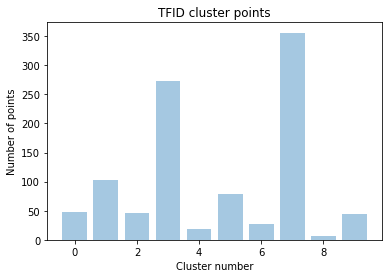

In [33]:
plt.bar([x for x in range(10)], dafrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [34]:
#Average Word to Vector
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [35]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    for w in sent.split():
      if(len(filtered_sentence) > 10000):
        continue
      for cleaned_words in cleanpunc(w).split():
        if(cleaned_words.isalpha()):
          filtered_sentence.append(cleaned_words.lower())
        else:
          continue 
    list_of_sent_train.append(filtered_sentence)
#print(list_of_sent_train)

In [36]:
print(list_of_sent_train[:10])

[['year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'doabl', 'year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'doabl', 'year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'd

In [37]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [38]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(1000, 100)

In [39]:
#K-Means Clustering
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

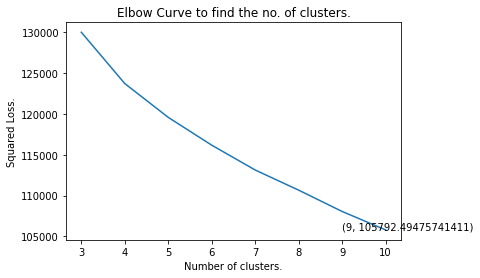

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  105792.49475741411


In [40]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
  # Train Cluster
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) 
    # Appending the squared loss obtained in the list
    squared_errors.append(kmeans.inertia_) 
# As argmin return the index of minimum loss.    
optimal_clusters = np.argmin(squared_errors) + 2  
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [41]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(n_clusters=9)

In [42]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-2.13482849, -0.3570196 ,  0.54155233, -0.65098648,  1.14078608,
        -0.04697078,  0.37929704,  0.03424704,  0.41120321,  0.1552955 ,
        -1.0169518 ,  0.49669112,  0.53067247, -0.71260032,  0.04411953,
         0.31281058, -0.58119186, -0.82866544,  0.36799142, -1.40135068,
         0.66489992,  0.2594063 ,  0.47263774,  0.11961372,  0.3704816 ,
         0.43564111, -0.29495752, -0.4626926 , -0.65990168, -0.18719746,
         1.52332383,  0.41087675,  1.3656254 ,  0.75897637, -0.16104065,
        -0.96232334,  0.01860333,  0.22062808, -0.07958454, -0.63235149,
        -0.97634383,  0.04204826, -0.65909108,  0.54697776, -0.85326863,
         1.53264461, -0.07840586,  0.71314309, -0.62527999, -0.25607986,
        -0.62411237, -0.50192787, -0.61777583,  0.99218298,  0.74777383,
         0.05697139, -0.08882744, -0.44034034,  0.40397282,  0.25134202,
        -0.16016197,  0.01096026,  0.05043573,  0.74243494, -0.45282703,
        -0.2305602 ,  0.22740682, -0.29313998,  0.5

In [43]:
dafrmea = dafrme1
dafrmea['AVG-W2V Clus Label'] = model2.labels_
dafrmea.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3,6


In [44]:
dafrmea.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     23
1    320
2     32
3    311
4     24
5     24
6     31
7    232
8      3
Name: Reviews, dtype: int64

In [45]:
#DBSCAN 
from sklearn.cluster import DBSCAN


# Computing 200th Nearest neighbour distance
min_Pts = 2 * 100
# The function returns the no in the array which is  greater than or equal to itself.
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching.
    while l <= r: 
        mid_term = int(l + (r - l) / 2)
        if nums[mid_term] >= target:
            r = mid_term - 1
        else:
            l = mid_term + 1
    return l
 # Returns the dist of 200th nearest neighbour.
def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances.
        dist = np.sum((x - val) **2 ) 
        # If dist is more than current largest distance found.
        if(len(dists) == 200 and dists[199] > dist): 
          # Using the lower bound function to get the right position.
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [46]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

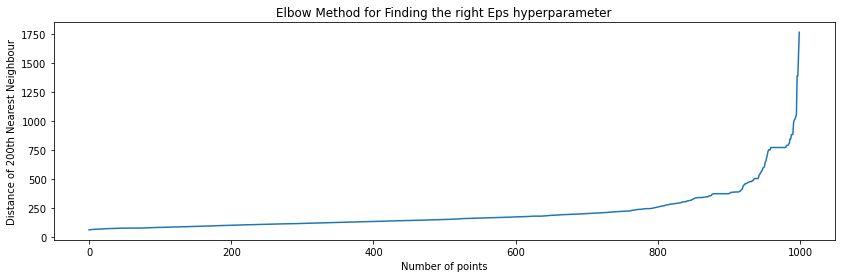

In [47]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [48]:
# Training DBSCAN :
minPts = 2 * 100
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [49]:
dfdb = dafrmea
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7,-1
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3,-1


In [50]:
dfdb.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
-1    1000
Name: Reviews, dtype: int64

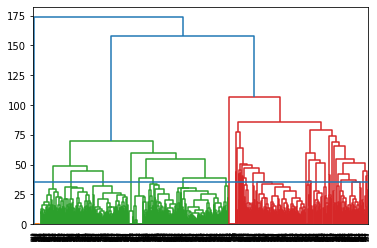

In [51]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [53]:
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7,2
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3,0


In [54]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    188
1    208
2    560
3     22
4     22
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
# You can write you answer here. (No code needed)


K-means clustering is based on the distance between the data points and the centroids of the clusters themselves. DBSCAN is used to perform clustering that is based on density. Here the areas where the points are concetrated the most are found and are segregated from empty space. Hierarchical clustering, as the name suggests involves clustering in layers. It begins with considering each data point as a seperate cluster and then finds the two clusters that are closer to each other. In machine learning, clustering techniques like as K-means and DBScan are widely used. In K-means clusters must have the same feature size when compared to DBScan it may not have the same feature size. K-means clusters are sensitive to the specified number of clusters. In DBScan no need to specify the number of clusters.K-means clustering is efficient for large data sets but DBScan can not handle high dimensional datasets.K-means has one parameter which is the number of clusters and DBScan has two parameters which are radius and minimum points